<h1 align="center">Purdue University</h1>
<h2 align="center">CNIT 623 (Fall 2022)</h2>
<h3 align="center">Assignment 1 - Nadine Amin</h3>

In [1]:
#import needed libraries
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt

## 1. Import the MNIST Dataset of Handwritten Digits

In [ ]:
#import dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

## 2. Explore & Preprocess the Dataset

In [3]:
#size of training images
train_images.shape

(60000, 28, 28)

In [4]:
#size of training labels
train_labels.shape

(60000,)

In [5]:
#size of testing images
test_images.shape

(10000, 28, 28)

In [6]:
#size of testing labels
test_labels.shape

(10000,)

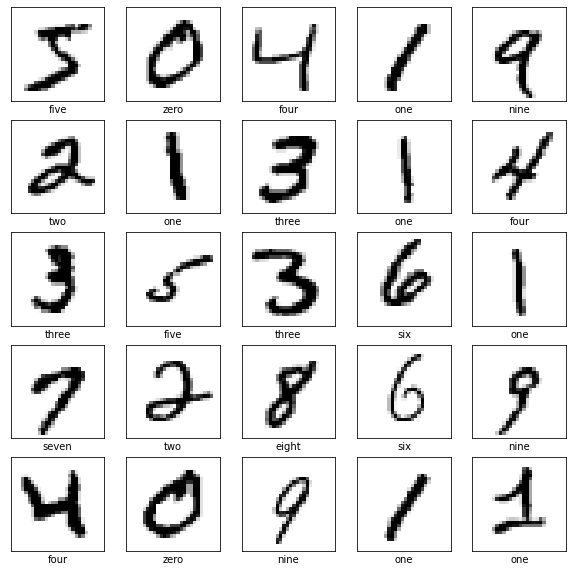

In [7]:
#display the first 25 images in the training dataset along with their labels
class_names = ['zero', 'one', 'two', 'three', 'four', 'five',
               'six', 'seven', 'eight', 'nine']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [8]:
#normalize input images
train_images = train_images.reshape(60000, 28, 28, 1).astype('float32')/255.0
test_images = test_images.reshape(10000, 28, 28, 1).astype('float32')/255.0

## 3. Build the Model

In [ ]:
#build the tf.keras.Sequential model by stacking layers
### 1 Hidden Layer ###
#model = models.Sequential()

#model.add(layers.Flatten(input_shape=(28,28,1)))
#model.add(layers.Dense(784, activation='relu'))
#model.add(layers.Dense(10, activation='softmax'))

#model.summary()

In [12]:
#build the tf.keras.Sequential model by stacking layers
### 2 Hidden Layers ###
model = models.Sequential()

model.add(layers.Flatten(input_shape=(28,28,1)))
model.add(layers.Dense(600, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 600)               471000    
                                                                 
 dense_4 (Dense)             (None, 100)               60100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 532,110
Trainable params: 532,110
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#build the tf.keras.Sequential model by stacking layers
### 3 Hidden Layers ###
#model = models.Sequential()

#model.add(layers.Flatten(input_shape=(28,28,1)))
#model.add(layers.Dense(600, activation='relu'))
#model.add(layers.Dense(50, activation='relu'))
#model.add(layers.Dense(50, activation='relu'))
#model.add(layers.Dense(10, activation='softmax'))

#model.summary()

In [13]:
#choose an optimizer and loss function for training
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

##Train the Model

In [ ]:
# train the fully-connected NN model
history = model.fit(train_images, train_labels, epochs=10, batch_size=128,
                    validation_data=(test_images, test_labels))

## Evaluate the Model

In [ ]:
#accuracy plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim([0, 9])
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('Test Loss: ', test_loss, '\nTest Accuracy: ', test_acc)

In [ ]:
#loss plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label = 'Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim([0, 9])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('Test Loss: ', test_loss, '\nTest Accuracy: ', test_acc)